# Frechet mean and tangent PCA on the sphere

This notebook shows how to compute the mean of a data set on the sphere.
Then it performs tangent PCA at the mean.

Before starting this tutorial, we set the working directory to be the root of the geomstats repository. In order to have the code working on your machine, you need to change this path to the path of your geomstats repository.

In [ ]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'], 
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA
from geomstats.geometry.hypersphere import Hypersphere

INFO: Using numpy backend


In [3]:
sphere = Hypersphere(dim=2)
data = sphere.random_von_mises_fisher(kappa=15, n_samples=140)

<IPython.core.display.Javascript object>


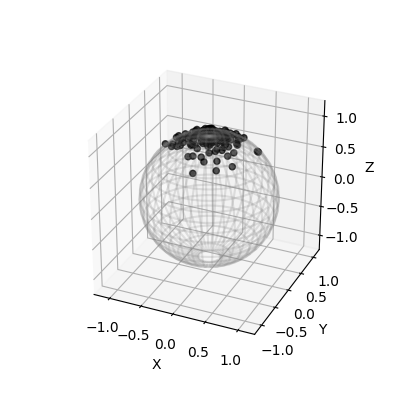

In [4]:
%matplotlib notebook
fig = plt.figure(figsize=(4, 4))
visualization.plot(data, space='S2', color='black', alpha=0.7);

In [5]:
mean = FrechetMean(metric=sphere.metric)
mean.fit(data)

mean_estimate = mean.estimate_

tpca = TangentPCA(metric=sphere.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

In [6]:
geodesic_0 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = np.linspace(-1, 1, n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t) 

<IPython.core.display.Javascript object>


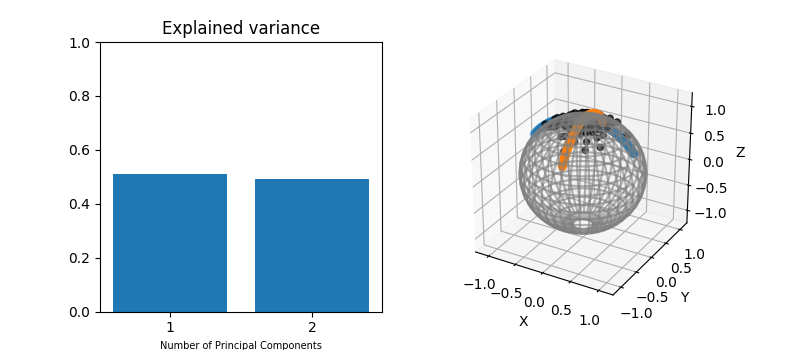

In [7]:
fig = plt.figure(figsize=(8, 3.5))
ax = fig.add_subplot(121)
xticks = np.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components', fontsize=7)
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122, projection="3d")

visualization.plot(
    mean_estimate, ax, space='S2', color='darkgreen', s=10)
visualization.plot(
    geodesic_points_0, ax, space='S2', linewidth=2)
visualization.plot(
    geodesic_points_1, ax, space='S2', linewidth=2)
visualization.plot(
    data, ax, space='S2', color='black', alpha=0.7)
plt.show()